In [3]:
from collections import deque

def bfs(grid, start, targets):
    
    rows, cols = len(grid), len(grid[0])
    queue = deque([(start, 0, [])])  
    visited = set()
    visited.add(start)
    found_targets = {}
    
    while queue:
        (x, y), steps, path = queue.popleft()
        path = path + [(x, y)]
        
        if (x, y) in targets:
            found_targets[(x, y)] = (steps, path)
            if len(found_targets) == len(targets):
                return found_targets
        
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 1 and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append(((nx, ny), steps + 1, path))
    
    return found_targets

def solve_maze_bfs(grid, start, goals, exit_point):
    remaining_goals = set(goals)
    current_position = start
    total_path = []
    
    while remaining_goals:
        paths = bfs(grid, current_position, remaining_goals)
        print(f"BFS from {current_position} found paths: {paths}")  
        
        if not paths:
            print("No path found to remaining goals.")
            return None 
        
        nearest_goal = min(paths, key=lambda g: paths[g][0])
        total_path.extend(paths[nearest_goal][1][1:])  
        remaining_goals.remove(nearest_goal)
        current_position = nearest_goal
    
    exit_path = bfs(grid, current_position, {exit_point})
    print(f"BFS to exit {exit_point} found path: {exit_path}") 
    
    if exit_point in exit_path:
        total_path.extend(exit_path[exit_point][1][1:])
    else:
        print("No path found to exit.")
        return None  
    
    return total_path

grid = [
    [1, 1, 1, 1, 0, 1],
    [1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 1]
]

start = (0, 0)
goals = [(1, 2), (5, 4), (2, 4), (0, 5)]
exit_point = (5, 5)

solution = solve_maze_bfs(grid, start, goals, exit_point)
print("Path to collect all goals and reach exit:", solution)

BFS from (0, 0) found paths: {(1, 2): (3, [(0, 0), (1, 0), (1, 1), (1, 2)]), (2, 4): (6, [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4)]), (0, 5): (9, [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5)])}
BFS from (1, 2) found paths: {(2, 4): (3, [(1, 2), (2, 2), (2, 3), (2, 4)]), (0, 5): (6, [(1, 2), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5)])}
BFS from (2, 4) found paths: {(0, 5): (3, [(2, 4), (1, 4), (1, 5), (0, 5)])}
BFS from (0, 5) found paths: {}
No path found to remaining goals.
Path to collect all goals and reach exit: None


In [4]:
from collections import deque
import heapq

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, targets):

    rows, cols = len(grid), len(grid[0])
    queue = [(0, start, [])]  
    visited = set()
    found_targets = {}
    
    while queue:
        cost, (x, y), path = heapq.heappop(queue)
        path = path + [(x, y)]
        
        if (x, y) in targets:
            found_targets[(x, y)] = (cost, path)
            if len(found_targets) == len(targets):
                return found_targets
        
        if (x, y) in visited:
            continue
        visited.add((x, y))
        
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] == 1:
                new_cost = cost + 1 + heuristic((nx, ny), start)
                heapq.heappush(queue, (new_cost, (nx, ny), path))
    
    return found_targets

def solve_maze_astar(grid, start, goals, exit_point, weights):
  
    remaining_goals = set(goals)
    current_position = start
    total_path = []
    
    while remaining_goals:
        paths = astar(grid, current_position, remaining_goals)
        print(f"A* from {current_position} found paths: {paths}")
        
        if not paths:
            print("No path found to remaining goals.") 
            return None  
        
        best_goal = min(paths, key=lambda g: paths[g][0] / weights[g]) 
        total_path.extend(paths[best_goal][1][1:])  
        remaining_goals.remove(best_goal)
        current_position = best_goal

    exit_path = astar(grid, current_position, {exit_point})
    print(f"A* to exit {exit_point} found path: {exit_path}") 
    
    if exit_point in exit_path:
        total_path.extend(exit_path[exit_point][1][1:])
    else:
        print("No path found to exit.")  
        return None  
    
    return total_path

grid = [
    [1, 1, 1, 1, 0, 1],
    [1, 1, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 1]
]

start = (0, 0)
goals = [(1, 2), (5, 4), (2, 4)]
weights = {(1, 2): 3, (5, 4): 5, (2, 4): 7}
exit_point = (5, 5)

solution = solve_maze_astar(grid, start, goals, exit_point, weights)
print("Path to collect all goals and reach exit:", solution)

A* from (0, 0) found paths: {(1, 2): (18, [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (1, 2)]), (2, 4): (42, [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 4)])}
A* from (1, 2) found paths: {(2, 4): (18, [(1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (2, 4)])}
A* from (2, 4) found paths: {}
No path found to remaining goals.
Path to collect all goals and reach exit: None


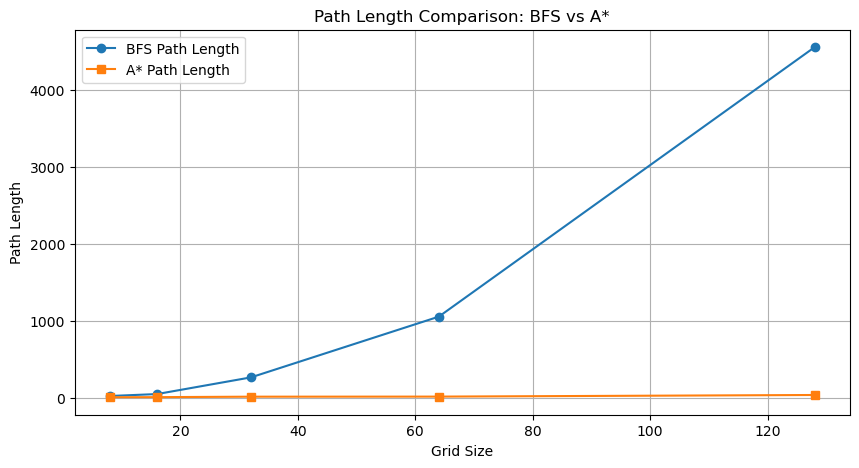

In [5]:
import numpy as np
import heapq
import time
import matplotlib.pyplot as plt
from collections import deque

def generate_grid(size, obstacle_percentage):
    grid = np.ones((size, size), dtype=int)
    num_obstacles = int(size * size * (obstacle_percentage / 100))
    
    obstacles = set()
    while len(obstacles) < num_obstacles:
        x, y = np.random.randint(0, size), np.random.randint(0, size)
        if (x, y) != (0, 0):  
            obstacles.add((x, y))
    
    for x, y in obstacles:
        grid[x, y] = 0  
    return grid

def bfs(grid, start, targets):
    rows, cols = grid.shape
    queue = deque([(start, 0, [])])  
    visited = set()
    found_targets = {}

    while queue:
        (x, y), steps, path = queue.popleft()
        path = path + [(x, y)]

        if (x, y) in targets:
            found_targets[(x, y)] = (steps, path)
            if len(found_targets) == len(targets):
                return found_targets

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx, ny] == 1 and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append(((nx, ny), steps + 1, path))

    return found_targets

def astar(grid, start, targets, weights):
    rows, cols = grid.shape
    queue = [(0, start, [])]
    heapq.heapify(queue)
    visited = {}

    while queue:
        cost, (x, y), path = heapq.heappop(queue)
        path = path + [(x, y)]

        if (x, y) in targets:
            return path

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and grid[nx, ny] == 1:
                new_cost = cost + weights.get((nx, ny), 1)
                if (nx, ny) not in visited or new_cost < visited[(nx, ny)]:
                    visited[(nx, ny)] = new_cost
                    heapq.heappush(queue, (new_cost, (nx, ny), path))

    return None

configs = [(8, 10, 2), (16, 10, 4), (32, 10, 8), (64, 15, 16), (128, 15, 32)]
analysis_results = []

for size, obs_percent, num_targets in configs:
    grid = generate_grid(size, obs_percent)
    start = (0, 0)
    targets = set()
    weights = {}

    while len(targets) < num_targets:
        tgt = (np.random.randint(size), np.random.randint(size))
        if grid[tgt] == 1 and tgt != start:
            targets.add(tgt)
            weights[tgt] = np.random.randint(1, 10)  

    exit_point = (np.random.randint(size), np.random.randint(size))
    while grid[exit_point] == 0 or exit_point in targets:
        exit_point = (np.random.randint(size), np.random.randint(size))

    bfs_start_time = time.time()
    bfs_path = bfs(grid, start, targets)
    bfs_time = time.time() - bfs_start_time
    bfs_length = sum(len(p[1]) for p in bfs_path.values()) if bfs_path else None

    astar_start_time = time.time()
    astar_path = astar(grid, start, targets, weights)
    astar_time = time.time() - astar_start_time
    astar_length = len(astar_path) if astar_path else None

    analysis_results.append((size, obs_percent, num_targets, bfs_length, bfs_time, astar_length, astar_time))

grid_sizes = [result[0] for result in analysis_results]
bfs_lengths = [result[3] if result[3] else 0 for result in analysis_results]
astar_lengths = [result[5] if result[5] else 0 for result in analysis_results]

plt.figure(figsize=(10, 5))
plt.plot(grid_sizes, bfs_lengths, label="BFS Path Length", marker="o")
plt.plot(grid_sizes, astar_lengths, label="A* Path Length", marker="s")
plt.xlabel("Grid Size")
plt.ylabel("Path Length")
plt.title("Path Length Comparison: BFS vs A*")
plt.legend()
plt.grid()
plt.show()